## 使用kNN手写数字识别

### 1. 导入数据

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# import touch
import os

# 读取mnist数据集
print(help(np.loadtxt))
m_x = np.loadtxt('mnist_x',delimiter=' ')
print(m_x.shape)
print(m_x)
print(m_x[0])
m_y = np.loadtxt('mnist_y')
print(m_y.shape)
print(m_y)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, *, quotechar=None, like=None)
    Load data from a text file.

    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must return bytes or strings. The strings
        in a list or produced by a generator are treated as lines.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
  

Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, colorizer: 'Colorizer | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba', 'auto'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.

    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    

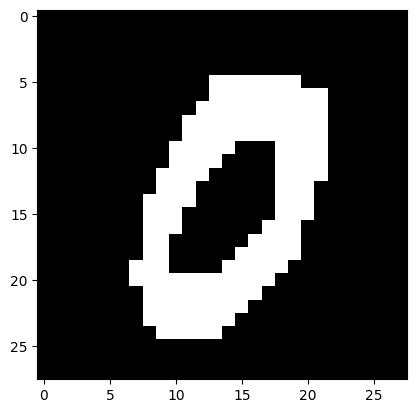

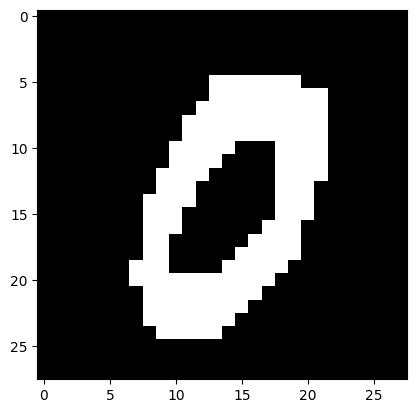

In [5]:
# 数据集可视化
data = np.reshape(m_x[0],[28,28])
plt.figure()
plt.imshow(data,cmap='gray')
print(help(plt.imshow))

data_int = np.reshape(np.array(m_x[0],dtype=int),[28,28])
plt.figure()
plt.imshow(data_int,cmap='gray')

### 2. 数据可视化

Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, colorizer: 'Colorizer | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba', 'auto'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.

    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    

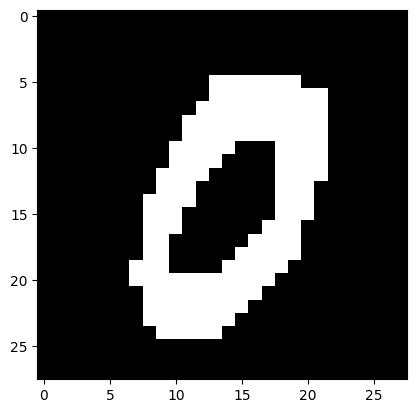

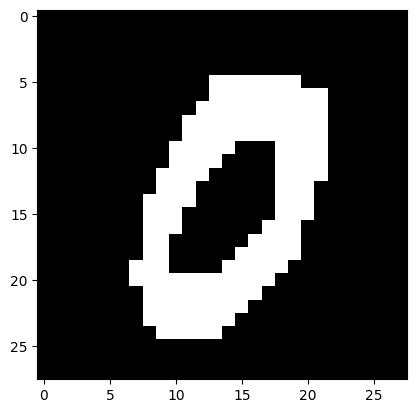

In [6]:
# 数据集可视化
data = np.reshape(m_x[0],[28,28])
plt.figure()
plt.imshow(data,cmap='gray')
print(help(plt.imshow))

data_int = np.reshape(np.array(m_x[0],dtype=int),[28,28])
plt.figure()
plt.imshow(data_int,cmap='gray')

### 3. 数据集划分

In [8]:
# 将数据集分为训练集和测试集
ratio = 0.8
split = int(len(m_x) * ratio)
np.random.seed(0)
idx = np.random.permutation(np.arange(len(m_x)))
m_x = m_x[idx]
m_y = m_y[idx]
x_train, y_train = m_x[:split], m_y[:split]
x_test, y_test = m_x[split:], m_y[split:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(800, 784)
(800,)
(200, 784)
(200,)
[0.0, 13.0, 10.392304845413264, 10.954451150103322, 10.816653826391969]


### 4. kNN具体实现

In [11]:
# 定义欧式距离
def distance(a,b):
    return np.sqrt(np.sum(np.square(a-b)))

In [12]:
x = x_train[0]
dst = list(map(lambda a: distance(a,x), x_train))
print(dst[:5])

[0.0, 13.0, 10.392304845413264, 10.954451150103322, 10.816653826391969]


In [17]:
# kNN算法类
class kNN:
    def __init__(self,k,label_num):
        self.k = k
        self.label_num = label_num # 类别数量
    
    def fit(self,x_train,y_train): # 在类中保存训练数据
        self.x_train = x_train
        self.y_train = y_train
    
    def get_knn_indices(self,x): # 获取距离目标样本x最近的K个样本的下标
        # 计算目标样本到所有训练集中样本的距离
        dst = list(map(lambda a: distance(a,x), self.x_train))
        # 按距离从小到大排序，并返回下标
        knn_indices = np.argsort(dst)
        # 取最近的k个
        knn_indices = knn_indices[:self.k]
        return knn_indices
    
    def get_label(self,x):
        # kNN的具体实现，观察K个近邻获取其中数量最多的类别
        knn_indices = self.get_knn_indices(x)
        # 对类别计数
        label_statistic = np.zeros(shape=[self.label_num])
        for index in knn_indices:
            label = int(self.y_train[index])
            label_statistic[label] += 1
        # 返回数量最多的类别
        return np.argmax(label_statistic)
    
    def predict(self,x_test):
        predicted_test_labels = np.zeros(shape=len(x_test),dtype=int)
        for i,x in enumerate(x_test):
           predicted_test_labels[i] = self.get_label(x)
        return predicted_test_labels

In [18]:
# 在测试集上观察算法效果
for k in range(1,10):
    knn = kNN(k,label_num=10)
    knn.fit(x_train,y_train)
    predicted_test_labels = knn.predict(x_test)

    accuracy = np.mean(predicted_test_labels == y_test) # 准确率0~1
    print(f'K的取值为：{k}，预测准确率为{accuracy*100:.1f}%')

K的取值为：1，预测准确率为83.0%
K的取值为：2，预测准确率为81.0%
K的取值为：3，预测准确率为81.5%
K的取值为：4，预测准确率为83.5%
K的取值为：5，预测准确率为82.5%
K的取值为：6，预测准确率为84.5%
K的取值为：7，预测准确率为84.0%
K的取值为：8，预测准确率为83.0%
K的取值为：9，预测准确率为82.5%


### 5. sklearn中的KNN算法

In [1]:
from sklearn.neighbors import KNeighborsClassifier # sklearn中的kNN分类器
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 读入高斯数据集
data = np.loadtxt("gauss.csv",delimiter=',')
print(type(data))
print(data[0:5])
x_train = data[:,:2] # 前两列是特征 
y_train = data[:,2] # 第三列是标签

<class 'numpy.ndarray'>
[[4.472  2.327  1.    ]
 [2.9668 2.6252 1.    ]
 [2.2212 3.1693 0.    ]
 [1.4587 1.9728 1.    ]
 [0.3717 3.0804 0.    ]]


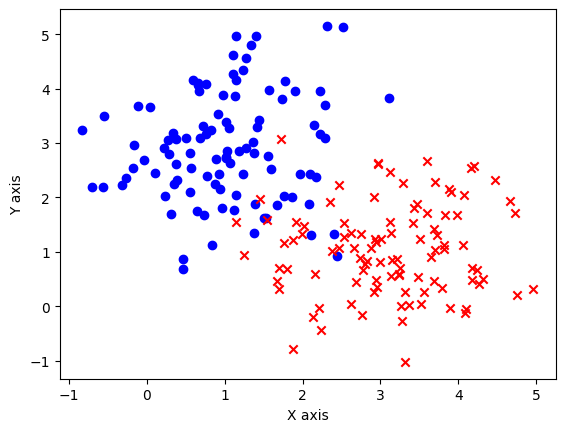

In [3]:
# 可视化
plt.figure() # 创建图窗?
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],c='blue',marker='o') # x的第一列作为横坐标，第二列作为纵坐标，绘制散点图
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],c='red',marker='x') # x的第一列作为横坐标，第二列作为纵坐标，绘制散点图
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [4]:
# 将整个数据集作为训练集，将平面上的其他点作为测试集
# 在平面上以 0.02 为间距构造网格作为测试集
step = 0.02
x_min, x_max = np.min(x_train[:,0]) - 1, np.max(x_train[:,0]) + 1
y_min, y_max = np.min(x_train[:,1]) - 1, np.max(x_train[:,1]) + 1

# 构造网格
xx,yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
print(xx.shape)
print(yy.shape)
print(type(xx))
print(xx[0:5])
print(yy[0:5])

(409, 390)
(409, 390)
<class 'numpy.ndarray'>
[[-1.828 -1.808 -1.788 ...  5.912  5.932  5.952]
 [-1.828 -1.808 -1.788 ...  5.912  5.932  5.952]
 [-1.828 -1.808 -1.788 ...  5.912  5.932  5.952]
 [-1.828 -1.808 -1.788 ...  5.912  5.932  5.952]
 [-1.828 -1.808 -1.788 ...  5.912  5.932  5.952]]
[[-2.0207 -2.0207 -2.0207 ... -2.0207 -2.0207 -2.0207]
 [-2.0007 -2.0007 -2.0007 ... -2.0007 -2.0007 -2.0007]
 [-1.9807 -1.9807 -1.9807 ... -1.9807 -1.9807 -1.9807]
 [-1.9607 -1.9607 -1.9607 ... -1.9607 -1.9607 -1.9607]
 [-1.9407 -1.9407 -1.9407 ... -1.9407 -1.9407 -1.9407]]


In [5]:
# xx.shape = (-1,1)
# yy.shape = (-1,1)
grid_data = np.concatenate([xx.reshape(-1,1),yy.reshape(-1,1)],axis=1)
print(type(grid_data))
print(grid_data[0:5])
# print(xx.shape)
# print(yy.shape)

<class 'numpy.ndarray'>
[[-1.828  -2.0207]
 [-1.808  -2.0207]
 [-1.788  -2.0207]
 [-1.768  -2.0207]
 [-1.748  -2.0207]]


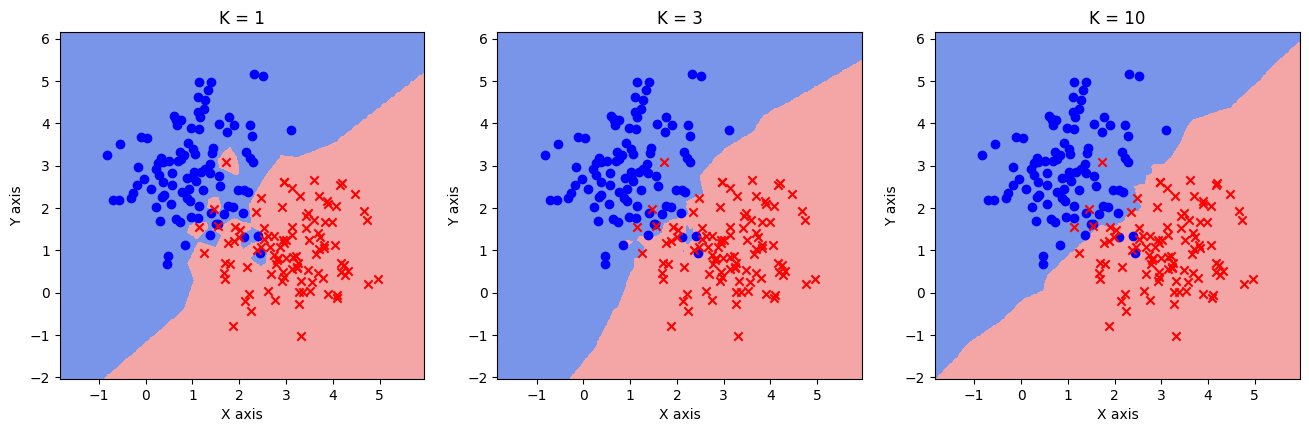

In [6]:
fig = plt.figure(figsize=(16,4.5))
Ks = [1,3,10]
# print(help(ListedColormap))
cmap_light = ListedColormap(['royalblue', 'lightcoral'])

for i,k in enumerate(Ks):
    # 定义KNN分类器
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    z = knn.predict(grid_data)
    
    # 画出不同k值的分类结果
    ax = fig.add_subplot(1,3,i+1)
    ax.pcolormesh(xx,yy,z.reshape(xx.shape),cmap=cmap_light,alpha=0.7)
    ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1],c='blue',marker='o')
    ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1],c='red',marker='x')
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(f'K = {k}')

plt.show()

## 使用kNN完成回归任务

In [3]:
!pip install scikit-image
from skimage import io # 图像输入输出
from skimage.color import rgb2lab, lab2rgb # 图像通道转换
from sklearn.neighbors import KNeighborsRegressor # KNN 回归器
import matplotlib.pyplot as plt
import numpy as np
import os

path = 'style_transfer'

style_transfer/vangogh
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


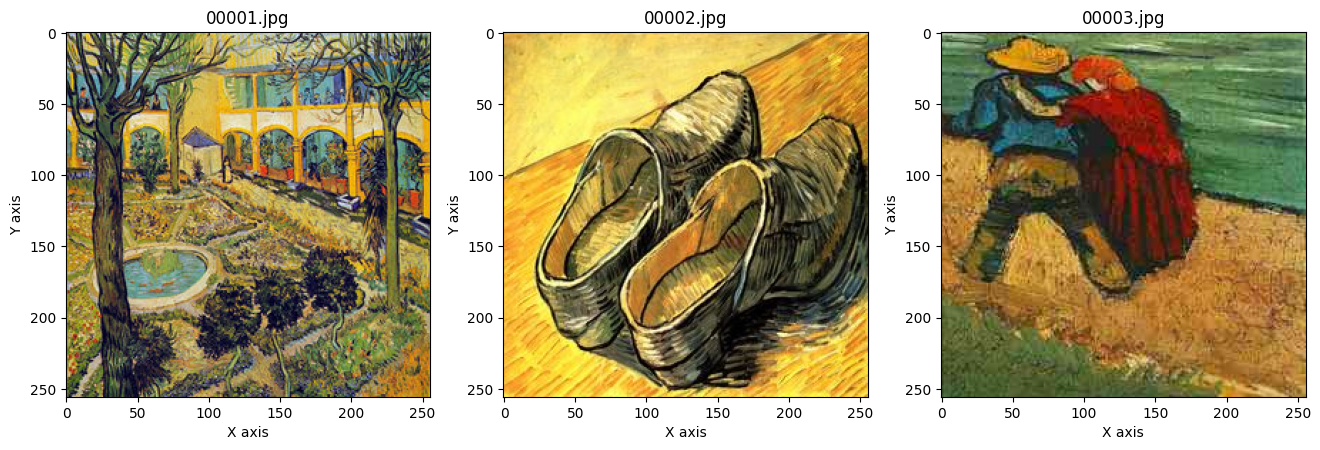

In [8]:
data_dir = os.path.join(path,'vangogh')
print(data_dir)
os.listdir(data_dir) # 类似于ls
fig = plt.figure(figsize=(16,5))
for i,file in enumerate(np.sort(os.listdir(data_dir))[:3]):
    img = io.imread(os.path.join(data_dir,file))
    print(img.shape)
    ax = fig.add_subplot(1,3,i+1)
    ax.imshow(img)
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_title(file)
plt.show()

In [16]:
block_size = 5
# 记录风格图像中，每个窗口对应的原始颜色
def read_style_image(file_name,size=block_size):
    # 读入风格图像, 得到映射 X->Y
    # 其中X储存3*3像素格的灰度值，Y储存中心像素格的色彩值
    # 读取图像文件，设图像宽为W，高为H，得到W*H*3的RGB矩阵
    img = io.imread(file_name)
    fig = plt.figure()
    plt.imshow(img)
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.show()

    # 将RGB转换为LAB表示法的矩阵，仍为W * H * 3的矩阵
    img = rgb2lab(img)
    w,h = img.shape[:2]

    X = []
    Y = []
    # 枚举全部可能的中心点
    for x in range(size,w-size):
        for y in range(size,h-size):
            # 保存所有窗口
            X.append(img[x-size:x+size+1,y-size:y+size+1,0].flatten()) # 亮度值
            Y.append(img[x,y,1:]); # 窗口中心的色彩值a和b
    return X,Y

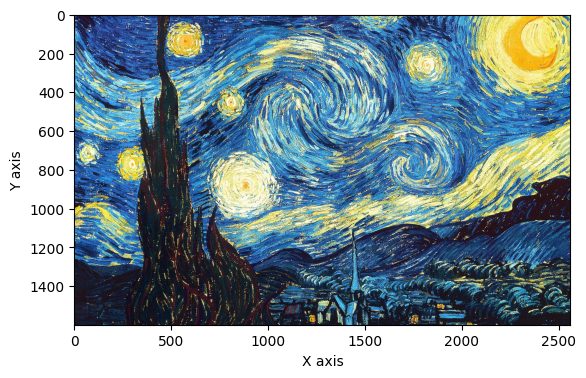

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [17]:
X,Y = read_style_image(os.path.join(path,'style.jpg'))

# weights='distance'表示邻居的权重与其到样本的距离成反比
knn = KNeighborsRegressor(n_neighbors=4, weights='distance')
knn.fit(X, Y)

In [18]:
# 将内容图像分割成同样大小的窗口，并用 KNN 模型上色
def rebuild(img,size=block_size):
    # 打印内容图像
    fig = plt.figure()
    plt.imshow(img)
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.show()
    
    # 将RGB转换为LAB表示法的矩阵，仍为W * H * 3的矩阵
    img = rgb2lab(img)
    w,h = img.shape[:2]

    # 初始化输出图像对应的矩阵
    photo = np.zeros([w,h,3])
    # 枚举内容图像的中心点，保存所有窗口
    print('Constructing window...')
    X = []
    for x in range(size,w-size):
        for y in range(size,h-size):
            # 中心点对应的图窗
            window = img[x-size:x+size+1,y-size:y+size+1,0].flatten() # 9个亮度
            X.append(window)
    X = np.array(X)

    # 用kNN预测颜色
    print('Predicting...')
    pred_ab = knn.predict(X).reshape(w - 2 * size, h - 2 * size, -1)
    # 设置输出图像
    photo[:, :, 0] = img[:, :, 0] # 亮度沿用以前的
    photo[size: w - size, size: h - size, 1:] = pred_ab # 颜色改为KNN预测的
    # 最外面size层无法构造窗口，简单起见，直接把这些像素裁剪掉
    photo = photo[size: w - size, size: h - size, :]
    return photo

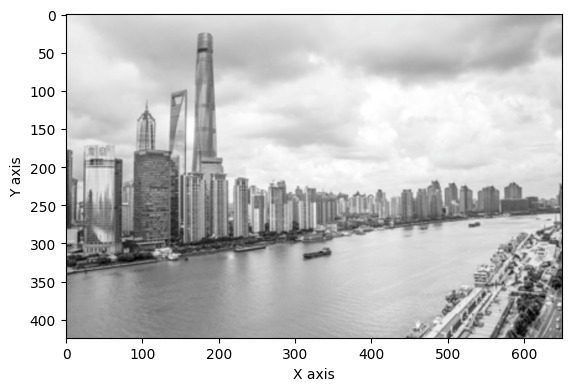

Constructing window...
Predicting...


In [ ]:
content = io.imread(os.path.join(path, 'input.jpg'))
new_photo = rebuild(content)
# 为了展示图像，我们将其再转换为RGB表示
new_photo = lab2rgb(new_photo)

fig = plt.figure()
plt.imshow(new_photo)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()